In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
plt.style.use('ggplot')

In [8]:
pip install nltk

In [9]:
import nltk

In [10]:
df = pd.read_csv(r'D:\hp\Documents\JAIN SEM 6\SMA\lab\archive 2\Musical_instruments_reviews.csv')

In [11]:
print(df)

           reviewerID        asin  \
0      A2IBPI20UZIR0U  1384719342   
1      A14VAT5EAX3D9S  1384719342   
2      A195EZSQDW3E21  1384719342   
3      A2C00NNG1ZQQG2  1384719342   
4       A94QU4C90B1AX  1384719342   
...               ...         ...   
10256  A14B2YH83ZXMPP  B00JBIVXGC   
10257   A1RPTVW5VEOSI  B00JBIVXGC   
10258   AWCJ12KBO5VII  B00JBIVXGC   
10259  A2Z7S8B5U4PAKJ  B00JBIVXGC   
10260  A2WA8TDCTGUADI  B00JBIVXGC   

                                           reviewerName   helpful  \
0      cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                                  Jake  [13, 14]   
2                         Rick Bennette "Rick Bennette"    [1, 1]   
3                             RustyBill "Sunday Rocker"    [0, 0]   
4                                         SEAN MASLANKA    [0, 0]   
...                                                 ...       ...   
10256                                   Lonnie M. Adams    [0, 0]   
102

In [12]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


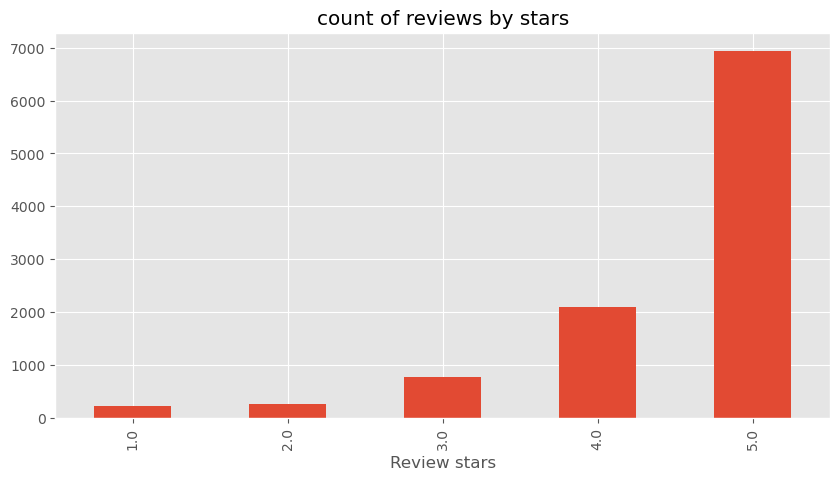

In [13]:
ax = df['overall'].value_counts().sort_index() \
    .plot(kind = "bar" , 
     title = 'count of reviews by stars' , 
     figsize=(10,5))
ax.set_xlabel('Review stars')
plt.show() 

In [14]:
##basic NLTK

In [18]:
example = df['reviewText'][1000]
print(example)

The tips of my fingers often get pretty dry and cracked, especially when I've been playing a lot.  The problem, at least for me, is that pieces of the dead skins sometimes catch on guitar strings making slides, bends, and pull-offs less fluid.  A few strokes of GHS makes the fretboard give me a much smoother playing experience.  An alternative would be using Vaseline on my fingers, but that would probably be terrible for my fretboard.  Also, I sometimes use an Emory board to smooth my fingertips which helps, but I'd rather do that as little as possible to keep callouses strong.  GHS allows me to minimize that.


In [19]:
tokens= nltk.word_tokenize(example)
tokens[:10]

['The', 'tips', 'of', 'my', 'fingers', 'often', 'get', 'pretty', 'dry', 'and']

In [20]:
tagged= nltk.pos_tag(tokens)
tagged[:10]

[('The', 'DT'),
 ('tips', 'NNS'),
 ('of', 'IN'),
 ('my', 'PRP$'),
 ('fingers', 'NNS'),
 ('often', 'RB'),
 ('get', 'VBP'),
 ('pretty', 'JJ'),
 ('dry', 'JJ'),
 ('and', 'CC')]

In [15]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  did/VBD
  n't/RB
  expect/VB
  this/DT
  cable/NN
  to/TO
  be/VB
  so/RB
  thin/JJ
  ./.
  It/PRP
  's/VBZ
  easily/RB
  1/2/CD
  the/DT
  thickness/NN
  of/IN
  any/DT
  guitar/NN
  cable/NN
  I/PRP
  've/VBP
  used/VBN
  ./.
  Not/RB
  sure/JJ
  about/IN
  long-term/JJ
  durability/NN
  or/CC
  signal/JJ
  loss/interference/NN
  ./.
  If/IN
  I/PRP
  had/VBD
  the/DT
  foresight/NN
  I/PRP
  'd/MD
  spend/VB
  a/DT
  couple/NN
  extra/JJ
  bucks/NNS
  on/IN
  a/DT
  thicker/NN
  cable/NN
  ./.
  Still/RB
  ,/,
  it/PRP
  works/VBZ
  and/CC
  was/VBD
  inexpensive.EDIT/VBN
  :/:
  6/CD
  months/NNS
  later/RB
  and/CC
  it/PRP
  's/VBZ
  dead/JJ
  already/RB
  ./.
  (PERSON Wire/NNP)
  frayed/VBD
  at/IN
  the/DT
  right/JJ
  angle/NN
  jack/NN
  ./.
  You/PRP
  get/VBP
  what/WP
  you/PRP
  pay/VBP
  for/IN
  ./.)


# VADER sentiment scoring

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [22]:
sia

In [23]:
sia.polarity_scores("This guitar was absolutely fantastic!")

{'neg': 0.0, 'neu': 0.489, 'pos': 0.511, 'compound': 0.6352}

In [24]:
sia.polarity_scores("this violin is the worst ")

{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'compound': -0.6249}

In [25]:
sia.polarity_scores(example)

{'neg': 0.074, 'neu': 0.818, 'pos': 0.109, 'compound': 0.4767}

In [38]:
#Run the polarity score on the entire dataset
df
    

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


In [39]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = str(row['reviewText'])
    myid = row['reviewerID']
    res[myid]= sia.polarity_scores(text)

  0%|          | 0/10261 [00:00<?, ?it/s]

In [40]:
res

{'A2IBPI20UZIR0U': {'neg': 0.025,
  'neu': 0.699,
  'pos': 0.277,
  'compound': 0.9596},
 'A14VAT5EAX3D9S': {'neg': 0.0,
  'neu': 0.796,
  'pos': 0.204,
  'compound': 0.9703},
 'A195EZSQDW3E21': {'neg': 0.103,
  'neu': 0.897,
  'pos': 0.0,
  'compound': -0.7455},
 'A2C00NNG1ZQQG2': {'neg': 0.0,
  'neu': 0.865,
  'pos': 0.135,
  'compound': 0.9184},
 'A94QU4C90B1AX': {'neg': 0.0, 'neu': 0.89, 'pos': 0.11, 'compound': 0.3802},
 'A2A039TZMZHH9Y': {'neg': 0.061,
  'neu': 0.717,
  'pos': 0.222,
  'compound': 0.6908},
 'A1UPZM995ZAH90': {'neg': 0.077,
  'neu': 0.727,
  'pos': 0.196,
  'compound': 0.7843},
 'AJNFQI3YR6XJ5': {'neg': 0.081,
  'neu': 0.863,
  'pos': 0.057,
  'compound': -0.6033},
 'A3M1PLEYNDEYO8': {'neg': 0.0,
  'neu': 0.935,
  'pos': 0.065,
  'compound': 0.8201},
 'AMNTZU1YQN1TH': {'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.8516},
 'A2NYK9KWFMJV4Y': {'neg': 0.009,
  'neu': 0.911,
  'pos': 0.08,
  'compound': 0.9138},
 'A35QFQI0M46LWO': {'neg': 0.0,
  'neu': 0.919,
 

In [41]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'reviewerID'})
vaders = vaders.merge(df, how='left')

In [42]:
#sentiment score and metadata
vaders.head()

,reviewerID,neg,neu,pos,compound,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,0.025,0.699,0.277,0.9596,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A2IBPI20UZIR0U,0.025,0.699,0.277,0.9596,B0002F7K7Y,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",I've been trying out different gauges to exper...,5.0,Get these,1378252800,"09 4, 2013"
2,A2IBPI20UZIR0U,0.025,0.699,0.277,0.9596,B0002GZM00,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",I've got 5 effects hooked up to this thing. It...,5.0,5 Hooked up,1393545600,"02 28, 2014"
3,A2IBPI20UZIR0U,0.025,0.699,0.277,0.9596,B0002IAJ56,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",Defiantly a space saver. I can put all of my e...,5.0,Space saver,1393545600,"02 28, 2014"
4,A2IBPI20UZIR0U,0.025,0.699,0.277,0.9596,B0002PBS6S,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",This is my first time using a hybrid mix and t...,5.0,Good Mix,1368489600,"05 14, 2013"


In [69]:
##Plot VADER results

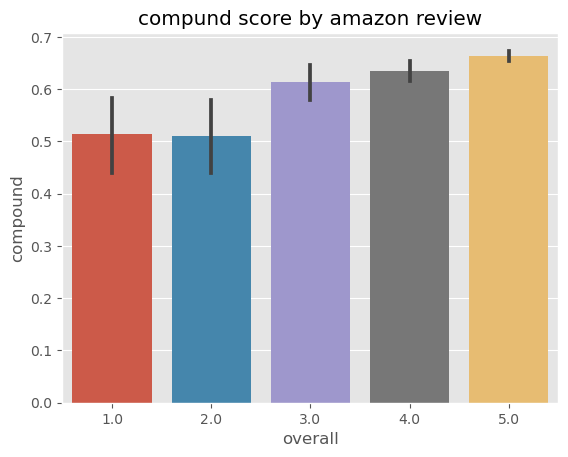

In [43]:
ax = sns.barplot(data=vaders, x='overall', y= 'compound')
ax.set_title("compund score by amazon review")
plt.show()

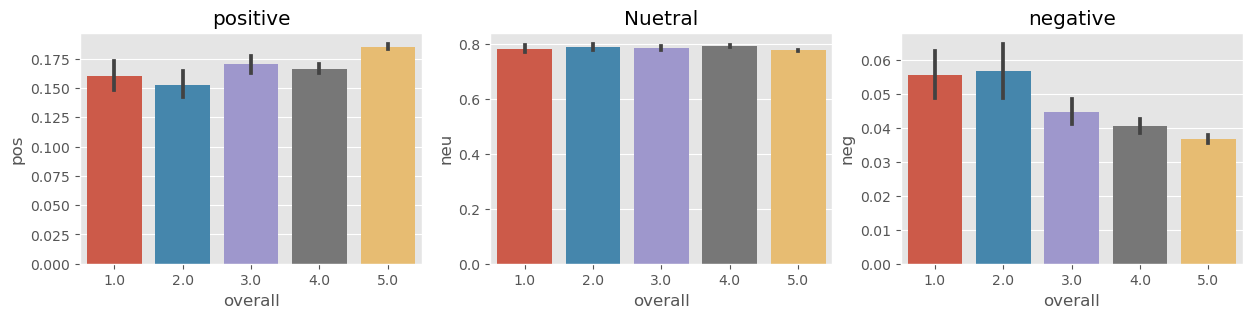

In [80]:
fig, axs = plt.subplots(1, 3, figsize=(15,3))
sns.barplot(data=vaders, x='overall', y= 'pos', ax=axs[0])
sns.barplot(data=vaders, x='overall', y= 'neu', ax=axs[1])
sns.barplot(data=vaders, x='overall', y= 'neg', ax=axs[2])
axs[0].set_title('positive')
axs[1].set_title('Nuetral')
axs[2].set_title('negative')
plt.show()